In [7]:
import tensorflow as tf
import pandas
import sklearn
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
def print_Examples(x_train, y_train):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i])
        plt.title("The label is " + str(y_train[i]))
        plt.axis("off")
        

In [10]:


def model(input_shape, num_classes,x_train, y_train,x_test,y_test, epochs):
    model = Sequential([ 
        layers.Rescaling(1./255, input_shape=input_shape), 
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Flatten(), 
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(num_classes, activation="softmax") 
    ]) 
    
    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy']) 

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    
    model.summary() 
    
    hist = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping])
    return model,hist


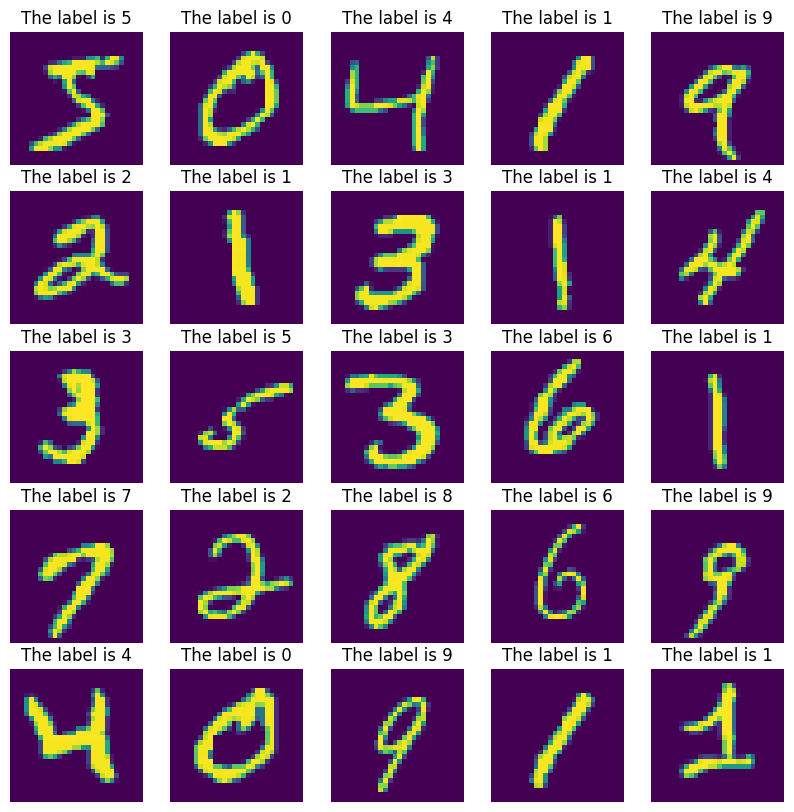

In [11]:
print_Examples(x_train, y_train)

In [12]:

epochs=30
model,hist = model((28,28,1), 10,x_train,y_train,x_test, y_test,epochs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)       

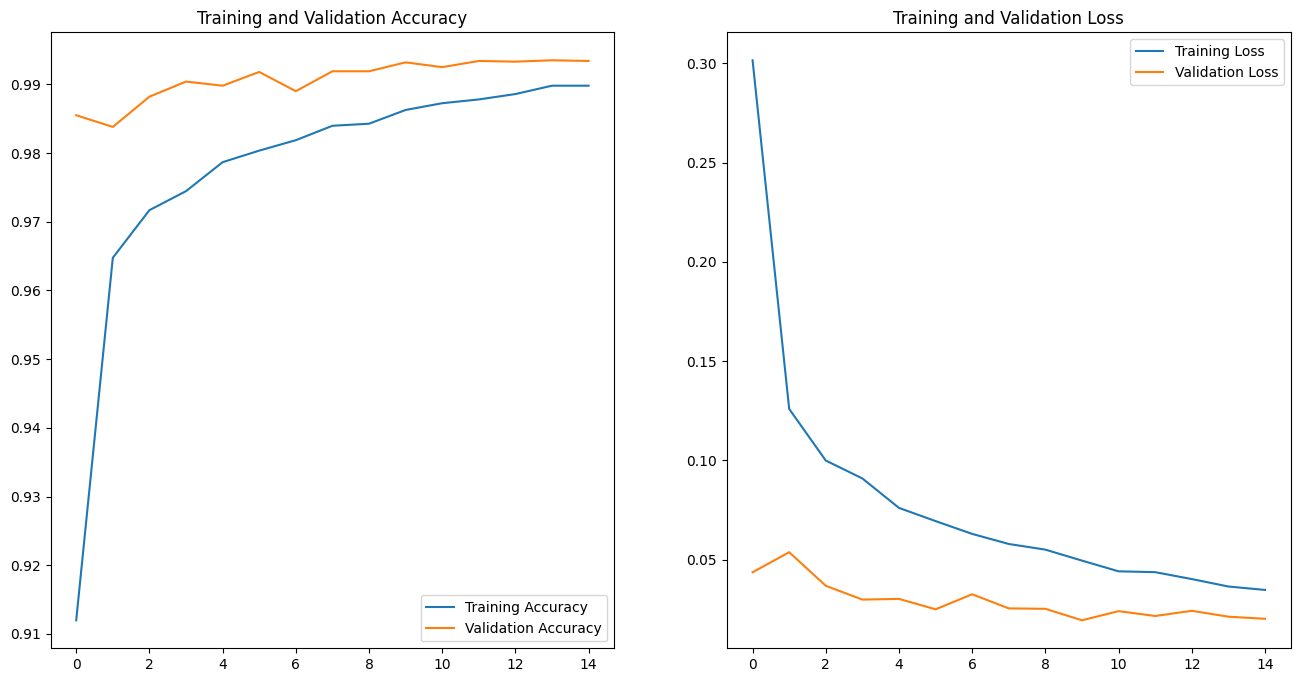

In [13]:
#Accuracy 
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 

#loss 

loss = hist.history['loss'] 
val_loss = hist.history['val_loss'] 

#epochs 
epochs_range = range(len(acc))

#Plotting graphs 
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [14]:
results = model.evaluate(x_test, y_test, batch_size=128)
results[1]

79/79 [==============================] - 1s 8ms/step - loss: 0.0202 - accuracy: 0.9934


0.993399977684021

In [16]:
model.save(f'model{results[1]}.h5',overwrite=False)

/home/himanshu/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[TIP] Next time specify overwrite=True!
